In [100]:
import opendatasets as od
import pandas as pd 
import numpy as np 
import random
import seaborn as sns 
from sklearn.metrics import mean_squared_error

In [8]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview"

In [10]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [04:34<00:00, 6.10MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction


In [3]:
data_dir = "new-york-city-taxi-fare-prediction"

In [4]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [5]:
name_col = ["key", "fare_amount", "pickup_datetime", "pickup_longitude", 
"pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]

In [6]:
length = len(df)
length

ss = round(length * 0.1)
ss

5542386

In [7]:
n = len(df)
s = round(n * 0.1)

skip = sorted(random.sample(range(n), n-s))
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv", usecols=name_col ,skiprows=skip)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
1,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
3,2015-01-11 03:15:38.0000001,58.0,2015-01-11 03:15:38 UTC,-73.983330,40.738720,-73.933197,40.847225,1
4,2012-01-19 10:15:30.0000002,5.3,2012-01-19 10:15:30 UTC,-73.995199,40.754740,-74.005416,40.751084,1
...,...,...,...,...,...,...,...,...
5542381,2012-10-19 09:25:00.00000033,5.5,2012-10-19 09:25:00 UTC,-73.958313,40.773880,-73.960103,40.766160,3
5542382,2009-06-03 20:16:35.0000002,5.3,2009-06-03 20:16:35 UTC,-73.976189,40.748318,-73.979680,40.757659,1
5542383,2014-03-04 22:25:01.0000002,12.0,2014-03-04 22:25:01 UTC,-73.983015,40.745082,-73.954176,40.767337,1
5542384,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1


In [64]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
1,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
2,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
3,2015-01-11 03:15:38.0000001,58.0,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1
4,2012-01-19 10:15:30.0000002,5.3,2012-01-19 10:15:30+00:00,-73.995199,40.754740,-74.005416,40.751084,1
...,...,...,...,...,...,...,...,...
5542381,2012-10-19 09:25:00.00000033,5.5,2012-10-19 09:25:00+00:00,-73.958313,40.773880,-73.960103,40.766160,3
5542382,2009-06-03 20:16:35.0000002,5.3,2009-06-03 20:16:35+00:00,-73.976189,40.748318,-73.979680,40.757659,1
5542383,2014-03-04 22:25:01.0000002,12.0,2014-03-04 22:25:01+00:00,-73.983015,40.745082,-73.954176,40.767337,1
5542384,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20+00:00,-73.957784,40.765530,-73.951640,40.773959,1


In [65]:
test_df = pd.read_csv("new-york-city-taxi-fare-prediction/test.csv", parse_dates=["pickup_datetime"])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5542386 entries, 0 to 5542385
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 338.3+ MB


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [68]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:34+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:03+0000', tz='UTC'))

C:\Users\saqui\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

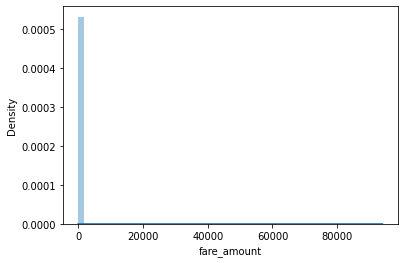

In [12]:
sns.distplot(df["fare_amount"])

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

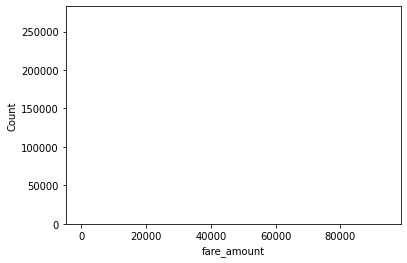

In [13]:
sns.histplot(df["fare_amount"])

In [14]:
sns.set(rc={"figure.figsize":(10, 15)})

<AxesSubplot:ylabel='fare_amount'>

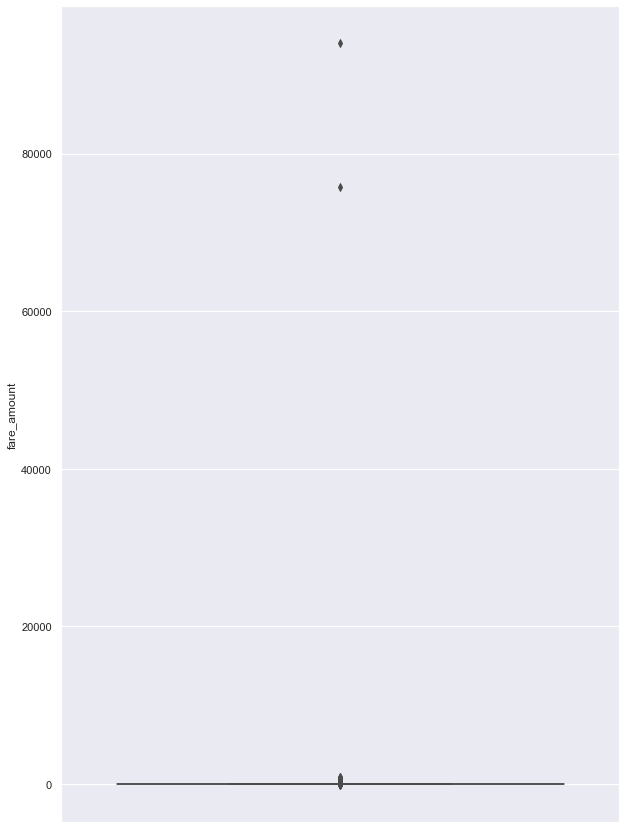

In [15]:
sns.boxplot(data = df, y = df["fare_amount"])

In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+06,5.542386e+06,5.542386e+06,5.542352e+06,5.542352e+06,5.542386e+06
mean,1.137051e+01,-7.251294e+01,3.991501e+01,-7.251100e+01,3.992041e+01,1.684901e+00
std,5.218740e+01,1.353429e+01,1.021585e+01,1.296545e+01,1.009616e+01,1.325679e+00
min,-8.325000e+01,-3.408459e+03,-3.458665e+03,-3.426601e+03,-3.441928e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073492e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398179e+01,4.075266e+01,-7.398014e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396705e+01,4.076715e+01,-7.396365e+01,4.076811e+01,2.000000e+00
max,9.396336e+04,3.061948e+03,3.376632e+03,3.457622e+03,3.537133e+03,2.080000e+02


In [69]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=10)

In [70]:
len(train_df), len(val_df)

(4433908, 1108478)

In [73]:
train_df.isna().sum(), val_df.isna().sum()

(key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64,
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64)

In [72]:
train_df, val_df = train_df.dropna(), val_df.dropna()

In [75]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4377063,2014-02-07 21:06:00.000000110,7.0,2014-02-07 21:06:00+00:00,-73.971628,40.757652,-73.988017,40.749037,1
549585,2009-11-01 03:27:54.0000002,7.3,2009-11-01 03:27:54+00:00,-74.004813,40.733962,-74.001387,40.746756,1
1766883,2014-06-27 06:40:46.0000001,4.5,2014-06-27 06:40:46+00:00,-73.989214,40.733260,-73.997748,40.735071,1
1912370,2012-05-01 05:02:00.0000005,4.5,2012-05-01 05:02:00+00:00,-73.944632,40.794492,-73.957060,40.777855,1
2338823,2012-03-07 12:28:00.000000144,10.9,2012-03-07 12:28:00+00:00,-73.982213,40.770560,-73.975655,40.752013,1
...,...,...,...,...,...,...,...,...
1976281,2010-06-09 09:15:31.0000004,6.9,2010-06-09 09:15:31+00:00,-73.990675,40.742090,-73.977659,40.755051,1
3251323,2012-12-15 13:37:05.0000004,5.0,2012-12-15 13:37:05+00:00,-73.961495,40.758740,-73.967489,40.767752,1
3589440,2014-05-04 00:55:00.000000230,9.0,2014-05-04 00:55:00+00:00,-73.983435,40.726242,-73.999275,40.742350,5
1929743,2014-07-12 15:05:00.000000152,9.5,2014-07-12 15:05:00+00:00,-73.985072,40.727827,-73.989455,40.744820,5


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

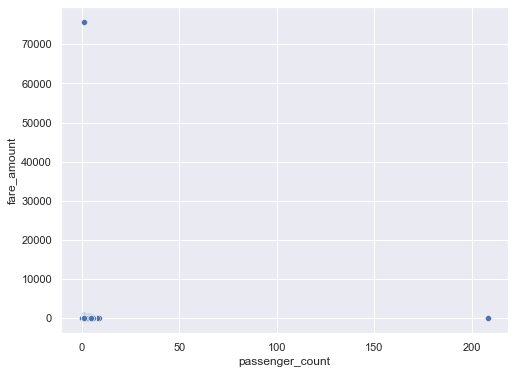

In [22]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.scatterplot(y = train_df["fare_amount"], x = train_df["passenger_count"])

In [76]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [87]:
df.isna().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    34
dropoff_latitude     34
passenger_count       0
dtype: int64

In [77]:
x_col = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", 
"dropoff_latitude", "passenger_count"]
y_col = "fare_amount"

In [88]:
x_train = train_df[x_col]
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4377063,-73.971628,40.757652,-73.988017,40.749037,1
549585,-74.004813,40.733962,-74.001387,40.746756,1
1766883,-73.989214,40.733260,-73.997748,40.735071,1
1912370,-73.944632,40.794492,-73.957060,40.777855,1
2338823,-73.982213,40.770560,-73.975655,40.752013,1
...,...,...,...,...,...
1976281,-73.990675,40.742090,-73.977659,40.755051,1
3251323,-73.961495,40.758740,-73.967489,40.767752,1
3589440,-73.983435,40.726242,-73.999275,40.742350,5
1929743,-73.985072,40.727827,-73.989455,40.744820,5


In [89]:
y_train = train_df[y_col]
y_train

4377063     7.0
549585      7.3
1766883     4.5
1912370     4.5
2338823    10.9
           ... 
1976281     6.9
3251323     5.0
3589440     9.0
1929743     9.5
5242852     3.3
Name: fare_amount, Length: 4433885, dtype: float64

### Validation Data

In [90]:
x_val = val_df[x_col]
x_val

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
953541,-73.991544,40.749827,-73.978274,40.751225,1
3896773,-73.958470,40.763818,-73.776430,40.646225,2
3470546,-73.870942,40.773667,-73.986807,40.684500,1
5377157,-73.986732,40.759781,-74.009308,40.715164,1
324553,-73.987959,40.743892,-73.988568,40.723223,1
...,...,...,...,...,...
1621775,-73.981335,40.755661,-73.979956,40.764082,1
2885062,-73.989312,40.742129,-73.955789,40.776236,2
438345,-73.964452,40.763935,-73.991405,40.754548,1
91825,-73.974395,40.762100,-73.991680,40.754161,1


In [91]:
y_val = val_df[y_col]
y_val

953541      5.7
3896773    49.8
3470546    36.5
5377157    13.5
324553      8.1
           ... 
1621775     8.9
2885062    10.9
438345      7.3
91825       6.5
2851163     6.5
Name: fare_amount, Length: 1108467, dtype: float64

Test Data

In [92]:
x_test = test_df[x_col]
x_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [93]:
x_train[x_col] = x_train[x_col].astype(float)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4433885 entries, 4377063 to 5242852
Data columns (total 5 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pickup_longitude   float64
 1   pickup_latitude    float64
 2   dropoff_longitude  float64
 3   dropoff_latitude   float64
 4   passenger_count    float64
dtypes: float64(5)
memory usage: 203.0 MB


C:\Users\saqui\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Modelling 

Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [96]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [98]:
y_lr_train = model_lr.predict(x_train)
y_lr_train

array([11.27880109, 11.27860709, 11.27870804, ..., 11.65527904,
       11.65530224, 11.27869949])

In [99]:
y_lr_val = model_lr.predict(x_train)
y_lr_val

array([11.27880109, 11.27860709, 11.27870804, ..., 11.65527904,
       11.65530224, 11.27869949])

In [102]:
train_rmse = mean_squared_error(y_train, y_lr_train, squared=False)
train_rmse

37.27433894303485

Feature Engineering

In [108]:
def date_time_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_weekday"] = df[col].dt.weekday
    df[col + "_time"] = df[col].dt.time 

    return date_time_extract

In [109]:
x_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4377063,-73.971628,40.757652,-73.988017,40.749037,1.0
549585,-74.004813,40.733962,-74.001387,40.746756,1.0
1766883,-73.989214,40.733260,-73.997748,40.735071,1.0
1912370,-73.944632,40.794492,-73.957060,40.777855,1.0
2338823,-73.982213,40.770560,-73.975655,40.752013,1.0
...,...,...,...,...,...
1976281,-73.990675,40.742090,-73.977659,40.755051,1.0
3251323,-73.961495,40.758740,-73.967489,40.767752,1.0
3589440,-73.983435,40.726242,-73.999275,40.742350,5.0
1929743,-73.985072,40.727827,-73.989455,40.744820,5.0


In [106]:
date_time_extract(df, "pickup_datetime")
date_time_extract(test_df, "pickup_datetime")

<function __main__.date_time_extract(df, col)>

In [107]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
0,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,4,5,04:30:42
1,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,11,1,20:35:00
2,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,1,2,17:22:00
3,2015-01-11 03:15:38.0000001,58.0,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1,2015,1,1,6,03:15:38
4,2012-01-19 10:15:30.0000002,5.3,2012-01-19 10:15:30+00:00,-73.995199,40.754740,-74.005416,40.751084,1,2012,1,1,3,10:15:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542381,2012-10-19 09:25:00.00000033,5.5,2012-10-19 09:25:00+00:00,-73.958313,40.773880,-73.960103,40.766160,3,2012,10,10,4,09:25:00
5542382,2009-06-03 20:16:35.0000002,5.3,2009-06-03 20:16:35+00:00,-73.976189,40.748318,-73.979680,40.757659,1,2009,6,6,2,20:16:35
5542383,2014-03-04 22:25:01.0000002,12.0,2014-03-04 22:25:01+00:00,-73.983015,40.745082,-73.954176,40.767337,1,2014,3,3,1,22:25:01
5542384,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20+00:00,-73.957784,40.765530,-73.951640,40.773959,1,2009,3,3,1,20:46:20
